# LINEAR REGRESSION


In [1]:
from pyforest import*
from sklearn.model_selection import cross_val_score

In [2]:
## TARGET is to predict the Tips

tips= sns.load_dataset("tips")

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
## converting into dummies

tips_dummy=pd.get_dummies(tips)
tips_dummy.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


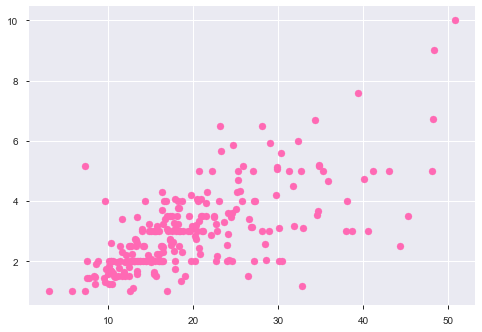

In [5]:
plt.scatter(tips.total_bill,tips.tip,color="hotpink")
plt.show()      #showing Linear

In [6]:
#importing standard scaler and train and test split
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()  # definning the calssifier



In [7]:
from sklearn.model_selection import train_test_split


In [8]:
#Define X and Y

x=tips_dummy.drop('tip',axis=1)
y=tips_dummy.tip

In [9]:
y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=234)
                        #RANDOM_STATE : there is a table in background for selection quality and prediction check

In [11]:
scaled_train=pd.DataFrame(sc.fit_transform(x_train),columns=x_train.columns)
scaled_train.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,-1.410557,-0.660565,0.748331,-0.748331,1.307032,-1.307032,-0.610933,-0.256074,-0.740013,1.482134,-0.634726,0.634726
1,0.751555,1.384040,0.748331,-0.748331,-0.765092,0.765092,-0.610933,-0.256074,-0.740013,1.482134,-0.634726,0.634726
2,0.935495,0.361738,0.748331,-0.748331,-0.765092,0.765092,-0.610933,-0.256074,-0.740013,1.482134,-0.634726,0.634726
3,0.988363,0.361738,0.748331,-0.748331,-0.765092,0.765092,-0.610933,-0.256074,1.351328,-0.674703,-0.634726,0.634726
4,-0.821290,-0.660565,0.748331,-0.748331,1.307032,-1.307032,-0.610933,-0.256074,1.351328,-0.674703,-0.634726,0.634726


In [12]:
scaled_test=pd.DataFrame(sc.transform(x_test),columns=x_test.columns)
scaled_test.head()

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,-0.746393,-0.660565,0.748331,-0.748331,-0.765092,0.765092,-0.610933,-0.256074,1.351328,-0.674703,-0.634726,0.634726
1,-0.734277,-0.660565,-1.336306,1.336306,-0.765092,0.765092,-0.610933,-0.256074,-0.740013,1.482134,-0.634726,0.634726
2,-0.552541,-0.660565,0.748331,-0.748331,-0.765092,0.765092,-0.610933,-0.256074,-0.740013,1.482134,-0.634726,0.634726
3,1.235084,0.361738,0.748331,-0.748331,-0.765092,0.765092,-0.610933,-0.256074,1.351328,-0.674703,-0.634726,0.634726
4,0.239389,-0.660565,0.748331,-0.748331,-0.765092,0.765092,-0.610933,-0.256074,-0.740013,1.482134,-0.634726,0.634726


# Linear Regression: SKLEARN

In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [14]:
model_lr=lr.fit(scaled_train,y_train).predict(scaled_test)

In [15]:
## finding RSQUARED and RMSE
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print('the R square of the model is' ,r2_score(y_test,model_lr))

the R square of the model is 0.4263876615064839


In [16]:
print('the RMSE is' ,np.sqrt(mean_squared_error(y_test,model_lr)))

the RMSE is 1.0685770660241278


In [17]:
#  BIAS AND VARIANCE ERRORS:--
scoresdt = cross_val_score(model_lr, x_train, y_train, cv=10)
print('Bias error=',1-np.mean(scoresdt))
print('Variance Error=',np.std(scoresdt,ddof=1))

TypeError: estimator should be an estimator implementing 'fit' method, array([2.23995129, 2.47913682, 2.50876433, 3.99520103, 3.10682906,
       2.00954248, 2.30585023, 3.563788  , 2.63441152, 5.50597986,
       2.26929298, 4.7818899 , 2.21291721, 2.10104057, 2.16947689,
       2.71006011, 4.5161282 , 3.41988647, 2.98455435, 3.48161565,
       2.65252446, 3.03576168, 2.31254662, 2.0311693 , 2.10881244,
       3.38921411, 3.1789295 , 3.36259649, 2.3748955 , 2.96832293,
       2.87891566, 2.65739043, 2.59891613, 2.89505678, 3.03954048,
       2.54226502, 2.61125175, 2.15363069, 2.40645283, 2.06291913,
       2.32123895, 2.42470908, 2.25511038, 2.47553758, 2.21361934,
       1.98481713, 3.76390828, 2.33583704, 2.48713751]) was passed

In [18]:
## Slope and intercept

lr.coef_   #slopes

array([ 0.75519901,  0.25319337, -0.02581255,  0.02581255, -0.02764309,
        0.02764309, -0.0645732 , -0.02244224,  0.00841393,  0.06491566,
        0.04243167, -0.04243167])

In [19]:
#intercept
lr.intercept_         # intercept

3.0083076923076923

In [20]:
##Mean absolute error
mean_absolute_error(y_test,model_lr) ## MAE always less than RMSE


##Hence to decide id linear model is a good model basis R2 score and rmse.
##higher the r_squared and lower the rmse is ideal situation.hence both metrics are inversely proportional

0.7908913526007442

In [21]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=123)   #for rigid value

randomforest = rf.fit(scaled_train, y_train).predict(scaled_test)

print('the R square of the model is' ,r2_score(y_test,randomforest))  ## R square will increase i.e features will explain the tips target

print('the RMSE is' ,np.sqrt(mean_squared_error(y_test,randomforest)))  ## RMSE also reduce here i.e prediction will more good

the R square of the model is 0.39000734760851075
the RMSE is 1.101942437383243


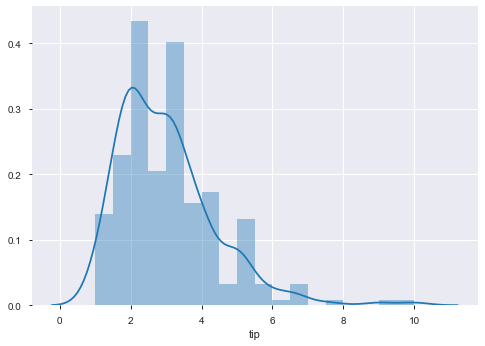

In [22]:
## Visualization of Actual vs LinearRegression vs Random Forest

sns.distplot(y,label='Actual values')
plt.show()

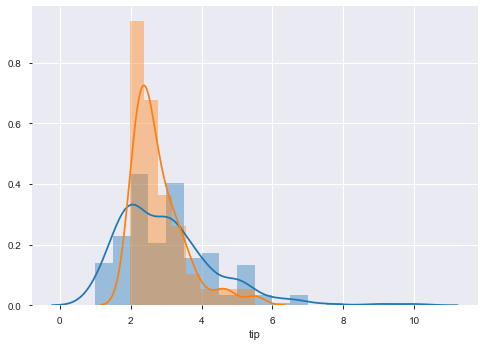

In [23]:
sns.distplot(y,label='Actual values')
sns.distplot(model_lr,label='LinearRegression')
plt.show()

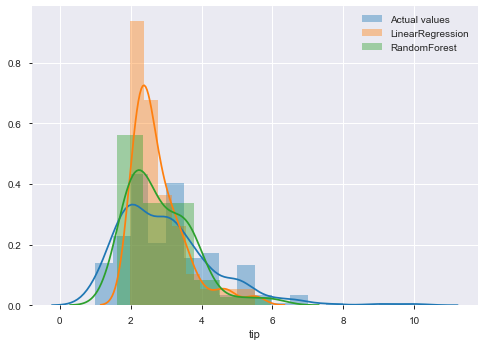

In [24]:
sns.distplot(y,label='Actual values')
sns.distplot(model_lr,label='LinearRegression')
sns.distplot(randomforest,label='RandomForest')
plt.legend()
plt.show()

## Linear Regression is not a good model bcoz it will extrapolate prediction the values as it is higher in visual then actual and Random forest is quite good coz it is near to actual value and rigid but both the model are not perfect for better prediction

# model by scipy.stats

In [25]:
import scipy.stats as stats
import statsmodels.api as sts

In [26]:
# creating a constant for scipy.ols regression model
newconstant=sts.add_constant(x)  # will add a constant
newconstant.head()       # drawback of python to create constant

C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,1.0,16.99,2,0,1,0,1,0,0,0,1,0,1
1,1.0,10.34,3,1,0,0,1,0,0,0,1,0,1
2,1.0,21.01,3,1,0,0,1,0,0,0,1,0,1
3,1.0,23.68,2,1,0,0,1,0,0,0,1,0,1
4,1.0,24.59,4,0,1,0,1,0,0,0,1,0,1


In [27]:
##linear regression model
model=sts.OLS(y_train,x_train).fit()

In [28]:
y_pred=model.predict(x_test)
y_pred #predicting values against fitted values

228    2.239951
158    2.479137
8      2.508764
39     3.995201
46     3.106829
75     2.009542
124    2.305850
160    3.563788
144    2.634412
170    5.505980
69     2.269293
125    4.781890
201    2.212917
232    2.101041
61     2.169477
41     2.710060
184    4.516128
154    3.419886
166    2.984554
33     3.481616
108    2.652524
18     3.035762
234    2.312547
233    2.031169
220    2.108812
240    3.389214
96     3.178930
72     3.362596
93     2.374896
229    2.968323
55     2.878916
98     2.657390
14     2.598916
91     2.895057
208    3.039540
174    2.542265
66     2.611252
117    2.153631
163    2.406453
43     2.062919
221    2.321239
194    2.424709
147    2.255110
127    2.475538
224    2.213619
217    1.984817
83     3.763908
171    2.335837
9      2.487138
dtype: float64

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     20.78
Date:                Thu, 27 Feb 2020   Prob (F-statistic):           2.51e-22
Time:                        16:50:30   Log-Likelihood:                -276.24
No. Observations:                 195   AIC:                             570.5
Df Residuals:                     186   BIC:                             599.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
total_bill      0.0832      0.011      7.729      0.000       0.062       0.104
size            0.2588      0.100      2.581      0.011       0.061       0.457
sex_Male        0.1377      0.106      1.305      0.194      -0.070       0.346
sex_Female      0.2453      0.103      2.392      0.018       0.043       0.448
smoker_Yes      0.1342      0.105      1.281      0.202      -0.072       0.341
smoker_No       0.2487      0.105      2.364      0.019       0.041       0.456
day_Thur       -0.0292      0.365     -0.080      0.936      -0.749       0.691
day_Fri         0.0226      0.243      0.093      0.926      -0.457       0.502
day_Sat         0.1336      0.228      0.587      0.558      -0.315       0.582
day_Sun         0.2560      0.237      1.081      0.281      -0.211       0.723
time_Lunch      0.2852      0.300      0.951      0.343      -0.307       0.877
time_Dinner     0.0977      0.252      0.388      0.699      -0.399       0.595
==============================================================================
Omnibus:                       19.955   Durbin-Watson:                   2.336
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.876
Skew:                           0.588   Prob(JB):                     1.97e-07
Kurtosis:                       4.554   Cond. No.                     4.02e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.96e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Assumptions 

In [30]:
## Resiodual plot
residual= model.resid
rsquare= model.rsquared
fitted= model.fittedvalues  #predicted values

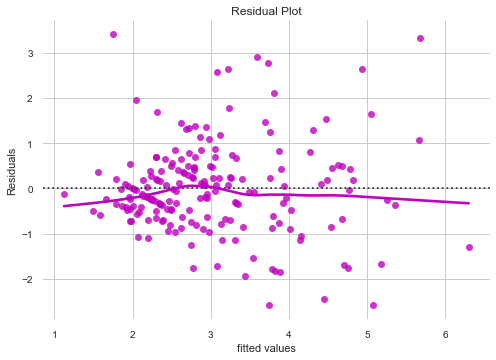

In [31]:
## ASSUMPTION:1 :-- Residual plot

sns.set_style('whitegrid')
sns.residplot(fitted,residual,color='m',lowess=True)
plt.xlabel('fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()      #Residual plot b/w fitted as x axis and Residual as Y axis

#there is no pattern b/w plot so linear follow by data so we need to check other assumption

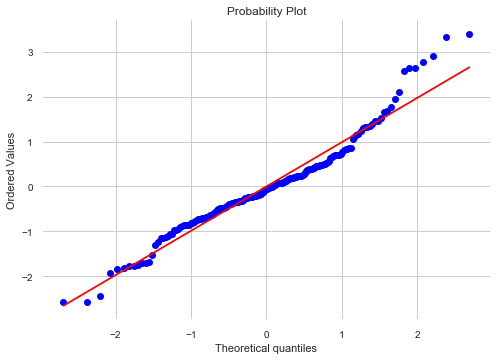

In [32]:
## ASSUMPTION:1 :-- checking the Normality(probabilty plot)

import pylab
stats.probplot(residual,dist='norm',plot= pylab)
plt.show()

### Test of Normality


In [33]:
## H0: error/data is normally distributed
## H1: error/data is not normally distributed


## alpha=0.05 

from scipy.stats import shapiro

shapiro(residual)
#p value is less than 0.05 so we reject H0 and errors/data are not normal i.e we will not apply Linear Regression as it failed in 2nd assumption.

(0.9592907428741455, 2.114874769176822e-05)

## Durbin watson test for Autocorrelation of Errors:-

### It will not generate p value only generate statistic and normally range is from 0 to 4.
where 2 represents no Autocorrelation
 0<2 : positive correlation (seen in Time Series dataset)

### The thumb rule is that any value of test statistic if lies b/w 1.5 to 2.5,it is normal in nature and if value is 1 or greater than 2.5.it is ci=onsidered to AUTOCORRELATED. 

In [34]:
##H0: Linear Regression Residuals are not correlated i.e mean is equal
##H1: Linear Regression Residuals are correlated i.e mean is not equal


import statsmodels.stats.api as dw

dw.durbin_watson(residual)    #only this test in stats where there is no p value


# statstics b/w 1.5 to 2.5 here so errors are not correlated and it is normal in nature

2.3362283469216254

## Hetroscedasticity:-

It means that the model displays unequal variance when it was deployed. Normally the ML/Stats domain assumes that the sampled data has equal/consistent variance. This helps in developing a better model that can sustain the future predictions.However,when data shows unequal variance pattern then it is not reliable in terms of making predictions.

Having said that,if the residual shows HETROSCEDASTICITY then Linear Regression is not a goos fit for data.


In [35]:
## H0: Residuals are not heroscedasticity in nature
## H1: Residuals are  heroscedasticity in nature

import statsmodels.stats.api as gq #goldfeldquandt

gq.het_goldfeldquandt(residual,x_train) 

# p value id greater then alpha accept H0 so no hetroscedasticity in residual
                                  ## increasing means increasing in order of hetroscedasticity and same as in decreasing order

(0.8641051560637241, 0.7531015239303072, 'increasing')

In [36]:
gq.het_breuschpagan(residual,x_train)

(33.73464173937238,
 0.0003996482845668421,
 4.863601389039913,
 1.8403292725949423e-05)

## Linearity: - RAINBOW TEST



In [37]:
## H0: Data is Linear in Nature
## H1:  Data is Linear in not Nature
import statsmodels.api as lrain

lrain.stats.diagnostic.linear_rainbow(model)
# p value id greater then alpha accept H0 so Data is Linear in Nature


(0.9707888249390191, 0.5580875042286176)

## Multicollinearity

In order to check Multicollinearity ,we use Variande Inflation Factor (VIF) amongs the predictiors .

and it will always apply on orginal data not on train and test and data must be numerical or dummy

1. Greater than 10: Multicollinear and need to drop such columns as there are not able to provide meaningful information for LR model.and sumtimes transform by taking average or sum of columns.

2. 

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
## for each predictors,calculate VIF and save it in DataFrame

vif=pd.DataFrame()

In [39]:
tips_dummy['constant']=1 #adding a constant for VIF

In [40]:
tips_dummy.values

array([[16.99,  1.01,  2.  , ...,  0.  ,  1.  ,  1.  ],
       [10.34,  1.66,  3.  , ...,  0.  ,  1.  ,  1.  ],
       [21.01,  3.5 ,  3.  , ...,  0.  ,  1.  ,  1.  ],
       ...,
       [22.67,  2.  ,  2.  , ...,  0.  ,  1.  ,  1.  ],
       [17.82,  1.75,  2.  , ...,  0.  ,  1.  ,  1.  ],
       [18.78,  3.  ,  2.  , ...,  0.  ,  1.  ,  1.  ]])

In [41]:
vif=[variance_inflation_factor(tips_dummy.values,i)
     for i in range(tips_dummy.shape[1])]
vif

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


[2.389803336631928,
 1.887070611384294,
 1.7071110296251015,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 0.0]

In [131]:
pd.DataFrame({'VIF':vif[0:]},index=tips_dummy.columns)   #categorical variable due to which multicollinearity is infinite and rest tips and size is not multicollinear

,VIF
total_bill,2.389803
tip,1.887071
size,1.707111
sex_Male,inf
sex_Female,inf
smoker_Yes,inf
smoker_No,inf
day_Thur,inf
day_Fri,inf
day_Sat,inf
